In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
num_classes = 10
input_shape = (28,28)

with np.load('dataset/mnist.npz') as data :
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']



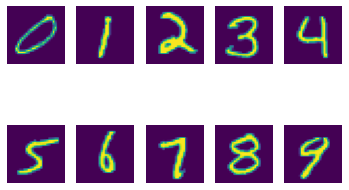

In [18]:
fig = plt.figure()

for y in range(num_classes):
    idx = np.random.choice(np.where(y_train==y)[0])
    sample = x_train[idx]
    a = fig.add_subplot(2,num_classes//2, y+1)
    plt.imshow(sample)
    plt.axis('off')
    if idx ==0:
        a.set_title('label={}'.format(y))


In [19]:
x_train = x_train.astype('float32')/255

x_test = x_test.astype('float32')/255

In [20]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy

In [22]:
class LeNet:

    @staticmethod
    def build(inputs=(28, 28, 1), outputs=10):

        model = Sequential()

        f1, f2 = [16, 64]

        # First block
        model.add(Conv2D(f1, (3, 3), input_shape=inputs, padding="same"))
        # model.add(Conv2D(f1, (1, 1), input_shape=inputs))
        model.add(ReLU())
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Second block
        model.add(Conv2D(f2, (3, 3), padding="same"))
        model.add(ReLU())
        model.add(MaxPooling2D())

        # FC
        model.add(Flatten())
        model.add(Dense(300))
        model.add(ReLU())

        model.add(Dense(outputs))

        # lastly, define the soft-max classifier
        model.add(Softmax())

        return model

model = LeNet.build()

optimizer = Adam(0.001)
model.compile(

    optimizer = optimizer,

    loss=SparseCategoricalCrossentropy(),

    metrics=[SparseTopKCategoricalAccuracy()],

)

model.fit(x_train,y_train)

1875/1875 [==============================] - 56s 29ms/step - loss: 0.1178 - sparse_top_k_categorical_accuracy: 0.9977


In [27]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(x_test)
print(f'Type pred :{y_predict.shape}')
print(f'Type test :{y_test.shape}')
accuracy_score(y_test, y_predict)

313/313 [==============================] - 2s 7ms/step
Type pred :(10000, 10)
Type test :(10000,)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets